In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import random
import sklearn
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential , Model
from tensorflow.keras.layers import Activation, Dropout, Dense, Flatten, BatchNormalization, Conv2D, MaxPooling2D, SeparableConv2D, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
from sklearn.metrics import accuracy_score, classification_report
from pathlib import Path
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [77]:
os.listdir("/Users/hrishi/Documents/DL/chest_xray/chest_xray")

['.DS_Store', 'test', 'Code.ipynb', 'Newcode.ipynb', 'train', 'val']

In [80]:
base_dir='/Users/hrishi/Documents/DL/chest_xray/chest_xray'

train_dir=os.path.join(base_dir, 'train')
test_dir=os.path.join(base_dir, 'test')
val_dir=os.path.join(base_dir, 'val')

train_normal=os.path.join(train_dir, 'NORMAL')
train_pneumonia=os.path.join(train_dir, 'PNEUMONIA')

test_normal=os.path.join(test_dir, 'NORMAL')
test_pneumonia=os.path.join(test_dir, 'PNEUMONIA')

val_normal=os.path.join(val_dir, 'NORMAL')
val_pneumonia=os.path.join(val_dir, 'PNEUMONIA')

In [81]:
print(train_normal)

/Users/hrishi/Documents/DL/chest_xray/chest_xray/train/NORMAL


In [79]:
train_normal=len(os.listdir(train_normal))
train_pneumonia=len(os.listdir(train_pneumonia))

total_train_count=train_normal+train_pneumonia

weight_normal=(total_train_count)/(train_normal*2)
weight_pneumonia=(total_train_count)/(train_pneumonia*2)

class_weight={ 0: weight_normal, 1: weight_pneumonia }

print(class_weight[0])
print(class_weight[1])

1.9441132637853948
0.6731166150670794
1342
3876


In [5]:
train_datagen = ImageDataGenerator(rescale = 1.0/255,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   zoom_range=0.3,
                                  )
validation_datagen  = ImageDataGenerator(rescale = 1.0/255)

# Flow training images in batches using train_datagen generator
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=64,
                                                    class_mode='binary',
                                                    target_size=(300, 300),
                                                    shuffle=True
                                                   )     

# Flow validation images in batches using test_datagen generator
validation_generator =  validation_datagen.flow_from_directory(val_dir,
                                                               batch_size=64,
                                                               class_mode  = 'binary',
                                                               target_size = (300, 300), 
                                                               shuffle=True
                                                              )

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [6]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation="relu", padding='same', input_shape=(300, 300, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Conv2D(32, kernel_size=(3, 3), activation="relu", padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Conv2D(32, kernel_size=(3, 3), activation="relu", padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Flatten())
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(1, activation="sigmoid"))

# Print the model summary
model.summary()

Metal device set to: Apple M2 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 300, 300, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 150, 150, 32)     0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 150, 150, 32)     128       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 150, 150, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      9248      
                                         

In [7]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [64]:
history = model.fit(train_generator,
                        validation_data=validation_generator,
                        epochs=10,
                        class_weight=class_weight,
                        verbose=1,
                       )

Epoch 1/10
82/82 [==============================] - 63s 752ms/step - loss: 0.6840 - accuracy: 0.7740 - val_loss: 3.9963 - val_accuracy: 0.5000
Epoch 2/10
82/82 [==============================] - 62s 750ms/step - loss: 0.3681 - accuracy: 0.8305 - val_loss: 4.0513 - val_accuracy: 0.5000
Epoch 3/10
82/82 [==============================] - 63s 762ms/step - loss: 0.3043 - accuracy: 0.8627 - val_loss: 4.2464 - val_accuracy: 0.5000
Epoch 4/10
82/82 [==============================] - 61s 744ms/step - loss: 0.3370 - accuracy: 0.8524 - val_loss: 7.6470 - val_accuracy: 0.5000
Epoch 5/10
82/82 [==============================] - 61s 746ms/step - loss: 0.2855 - accuracy: 0.8788 - val_loss: 2.6565 - val_accuracy: 0.5625
Epoch 6/10
82/82 [==============================] - 61s 745ms/step - loss: 0.2537 - accuracy: 0.8982 - val_loss: 2.8893 - val_accuracy: 0.6250
Epoch 7/10
82/82 [==============================] - 60s 734ms/step - loss: 0.2504 - accuracy: 0.8988 - val_loss: 0.7896 - val_accuracy: 0.5625

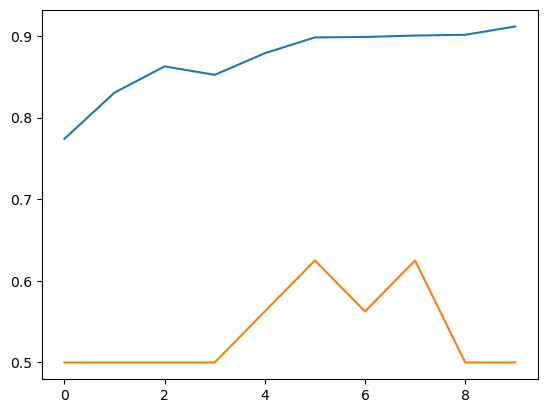

In [65]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [44]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Create the AlexNet model
model1 = Sequential()

# Layer 1: Convolutional Layer
model1.add(Conv2D(filters=96, kernel_size=(11, 11), strides=(4, 4), activation='relu', input_shape=(300, 300, 3)))

# Layer 2: Max Pooling
model1.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

# Layer 3: Convolutional Layer
model1.add(Conv2D(filters=256, kernel_size=(5, 5), padding='same', activation='relu'))

# Layer 4: Max Pooling
model1.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

# Layer 5: Convolutional Layer
model1.add(Conv2D(filters=384, kernel_size=(3, 3), padding='same', activation='relu'))

# Layer 6: Convolutional Layer
model1.add(Conv2D(filters=384, kernel_size=(3, 3), padding='same', activation='relu'))

# Layer 7: Convolutional Layer
model1.add(Conv2D(filters=256, kernel_size=(3, 3), padding='same', activation='relu'))

# Layer 8: Max Pooling
model1.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

# Layer 9: Flatten
model1.add(Flatten())

# Layer 10: Fully-Connected Layer
model1.add(Dense(units=4096, activation='relu'))

# Layer 11: Fully-Connected Layer
model1.add(Dense(units=4096, activation='relu'))

# Layer 12: Output Layer
model1.add(Dense(units=1, activation='sigmoid'))

# Print the summary of the model architecture
model1.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_33 (Conv2D)          (None, 73, 73, 96)        34944     
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 36, 36, 96)       0         
 g2D)                                                            
                                                                 
 conv2d_34 (Conv2D)          (None, 36, 36, 256)       614656    
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 17, 17, 256)      0         
 g2D)                                                            
                                                                 
 conv2d_35 (Conv2D)          (None, 17, 17, 384)       885120    
                                                                 
 conv2d_36 (Conv2D)          (None, 17, 17, 384)      

In [45]:
model1.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])

In [46]:
history = model1.fit(train_generator,
                        validation_data=validation_generator,
                        epochs=10,
                        class_weight=class_weight,
                        verbose=1,
                       )

Epoch 1/10
82/82 [==============================] - 62s 752ms/step - loss: 0.6908 - accuracy: 0.3462 - val_loss: 0.6903 - val_accuracy: 0.5000
Epoch 2/10
82/82 [==============================] - 61s 741ms/step - loss: 0.6851 - accuracy: 0.4034 - val_loss: 0.6863 - val_accuracy: 0.6250
Epoch 3/10
82/82 [==============================] - 61s 742ms/step - loss: 0.6743 - accuracy: 0.5232 - val_loss: 0.6751 - val_accuracy: 0.6875
Epoch 4/10
82/82 [==============================] - 61s 741ms/step - loss: 0.6639 - accuracy: 0.5882 - val_loss: 0.7199 - val_accuracy: 0.5000
Epoch 5/10
82/82 [==============================] - 61s 747ms/step - loss: 0.6429 - accuracy: 0.6388 - val_loss: 0.6345 - val_accuracy: 0.7500
Epoch 6/10
82/82 [==============================] - 61s 748ms/step - loss: 0.6097 - accuracy: 0.6743 - val_loss: 0.6248 - val_accuracy: 0.7500
Epoch 7/10
82/82 [==============================] - 62s 758ms/step - loss: 0.5562 - accuracy: 0.7331 - val_loss: 0.5799 - val_accuracy: 0.6250

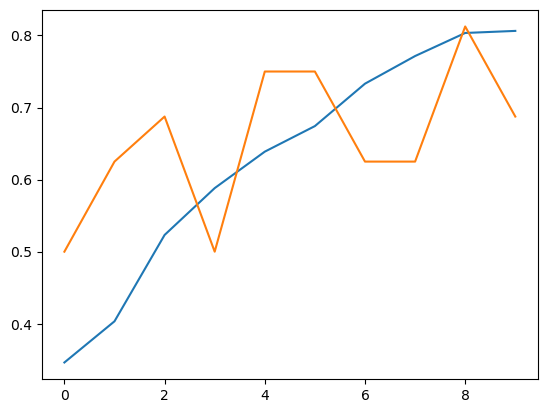

In [47]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [52]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

# Set the input shape and number of classes
input_shape = (300, 300, 3)
num_classes = 1

# Load the pre-trained ResNet-50 model without the top classification layer
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)

# Freeze the pre-trained layers so they are not updated during training
for layer in base_model.layers:
    layer.trainable = False

# Add a global average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)

# Add a fully-connected layer
x = Dense(1024, activation='relu')(x)

# Add an output layer with softmax activation for classification
predictions = Dense(num_classes, activation='sigmoid')(x)

# Create the model
model2 = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the summary of the model architecture
model2.summary()

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_8 (InputLayer)           [(None, 300, 300, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 306, 306, 3)  0           ['input_8[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 150, 150, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [53]:
history2 = model2.fit(train_generator,
                        validation_data=validation_generator,
                        epochs=10,
                        class_weight=class_weight,
                        verbose=1,
                       )

Epoch 1/10
82/82 [==============================] - 66s 773ms/step - loss: 0.8045 - accuracy: 0.5541 - val_loss: 0.7025 - val_accuracy: 0.5000
Epoch 2/10
82/82 [==============================] - 64s 778ms/step - loss: 0.6253 - accuracy: 0.6223 - val_loss: 0.6271 - val_accuracy: 0.5625
Epoch 3/10
82/82 [==============================] - 64s 772ms/step - loss: 0.5600 - accuracy: 0.7203 - val_loss: 0.5788 - val_accuracy: 0.7500
Epoch 4/10
82/82 [==============================] - 65s 785ms/step - loss: 0.5146 - accuracy: 0.7611 - val_loss: 0.5746 - val_accuracy: 0.6250
Epoch 5/10
82/82 [==============================] - 63s 767ms/step - loss: 0.4904 - accuracy: 0.7636 - val_loss: 0.5507 - val_accuracy: 0.6875
Epoch 6/10
82/82 [==============================] - 63s 769ms/step - loss: 0.4934 - accuracy: 0.7711 - val_loss: 0.5403 - val_accuracy: 0.6875
Epoch 7/10
82/82 [==============================] - 63s 768ms/step - loss: 0.4690 - accuracy: 0.7765 - val_loss: 0.5724 - val_accuracy: 0.6875

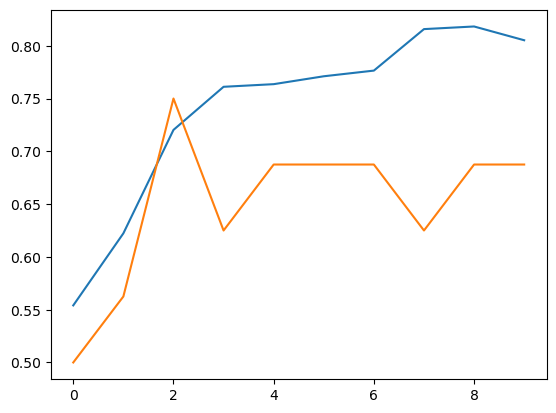

In [54]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])

In [55]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

# Set the input shape and number of classes
input_shape = (300, 300, 3)
num_classes = 1

# Load the pre-trained VGG16 model without the top classification layer
base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)

# Freeze the pre-trained layers so they are not updated during training
for layer in base_model.layers:
    layer.trainable = False

# Add a global average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)

# Add a fully-connected layer
x = Dense(1024, activation='relu')(x)

# Add an output layer with softmax activation for binary classification
predictions = Dense(num_classes, activation='softmax')(x)

# Create the model
model3 = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the summary of the model architecture
model3.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 300, 300, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 300, 300, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 300, 300, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 150, 150, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 150, 150, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 150, 150, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 75, 75, 128)       0   

In [56]:
history3 = model3.fit(train_generator,
                        validation_data=validation_generator,
                        epochs=10,
                        class_weight=class_weight,
                        verbose=1,
                       )

Epoch 1/10
82/82 [==============================] - 67s 805ms/step - loss: 0.4301 - accuracy: 0.7429 - val_loss: 0.5152 - val_accuracy: 0.5000
Epoch 2/10
82/82 [==============================] - 66s 797ms/step - loss: 0.2899 - accuracy: 0.7429 - val_loss: 0.4537 - val_accuracy: 0.5000
Epoch 3/10
82/82 [==============================] - 66s 797ms/step - loss: 0.2565 - accuracy: 0.7429 - val_loss: 0.4309 - val_accuracy: 0.5000
Epoch 4/10
82/82 [==============================] - 67s 806ms/step - loss: 0.2321 - accuracy: 0.7429 - val_loss: 0.4085 - val_accuracy: 0.5000
Epoch 5/10
82/82 [==============================] - 66s 793ms/step - loss: 0.2064 - accuracy: 0.7429 - val_loss: 0.3844 - val_accuracy: 0.5000
Epoch 6/10
82/82 [==============================] - 66s 795ms/step - loss: 0.2137 - accuracy: 0.7429 - val_loss: 0.5594 - val_accuracy: 0.5000
Epoch 7/10
82/82 [==============================] - 66s 794ms/step - loss: 0.1872 - accuracy: 0.7429 - val_loss: 0.3948 - val_accuracy: 0.5000

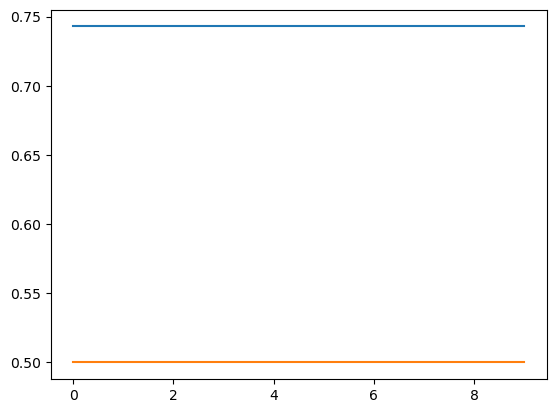

In [57]:
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])